In [1]:
import cmocean.cm as cm
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import xarray as xr
from salishsea_tools import visualisations as vis
from salishsea_tools import viz_tools

%matplotlib inline

In [3]:
#mesh = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
#bathy = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')
mesh = nc.Dataset('/Users/sallen/Documents/MEOPAR/grid/mesh_mask201702.nc')
bathy = nc.Dataset('/Users/sallen/Documents/MEOPAR/grid/bathymetry_201702.nc')
mesh

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    file_name: NEMO-forcing/grid/mesh_mask201702.nc
    TimeStamp: 30/09/2017 16:10:02 -0700
    Conventions: CF-1.6
    title: Salish Sea NEMO bathymetry_201702 Bathymetry Mesh Mask
    institution: Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia
    source: NEMO-3.6 Salish Sea configuration
    references: https://salishsea.eos.ubc.ca/erddap/info/
https://bitbucket.org/salishsea/nemo-forcing/src/tip/grid/bathymetery_201702.nc

    history: [2017-09-30 16:10] ncks -4 -L4 -O mesh_mask.nc mesh_mask201702.nc
[2017-10-10 15:48] Added metadata to variable in preparation for creation of ERDDAP datasets.
    dimensions(sizes): y(898), x(398), t(1), z(40)
    variables(dimensions): float32 nav_lon(y,x), float32 nav_lat(y,x), float64 time_counter(t), int8 tmask(t,z,y,x), int8 umask(t,z,y,x), int8 vmask(t,z,y,x), int8 fmask(t,z,y,x), int8 tmaskutil(t,y,x), int8 umaskutil(t,y,x), int

In [28]:
imin, imax = 0, 40
jmin, jmax = 0, 950

In [31]:
def make_plots(fig, ax, variable, name, ng, hd, cmap, vmaxm, vminm, scale):
    green = np.array(ng.variables[variable][0, :, 0])
    hind = np.array(hd.variables[variable][0, :, 0])
    print (green.shape)

    colors = axs[0].pcolormesh(green[imin:imax, jmin:jmax], cmap=cmap, vmax=vmaxm, vmin=vminm)
    fig.colorbar(colors, ax=axs[0], extend='both')

    colors = axs[1].pcolormesh(hind[imin:imax, jmin:jmax], cmap=cmap, vmax=vmaxm, vmin=vminm)
    fig.colorbar(colors, ax=axs[1], extend='both')

    colors = axs[2].pcolormesh(hind[imin:imax, jmin:jmax] - green[imin:imax, jmin:jmax], cmap='bwr', vmax=scale, vmin=-scale)
    fig.colorbar(colors, ax=axs[2], extend='both')
            
    axs[0].set_title('Old Boundary Conditions')
    axs[1].set_title('New Boundary Conditions')
    axs[2].set_title('New - Old')

# Physics

In [36]:
old = xr.open_dataset('LiveOcean_v201712_y2019m07d06.nc.aside')
new = xr.open_dataset('LiveOcean_v201712_y2019m07d06.nc')
new

<xarray.Dataset>
Dimensions:       (deptht: 40, time_counter: 1, xbT: 950, yb: 1)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2019-07-07T12:00:00
  * deptht        (deptht) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.501 8.501 ...
  * yb            (yb) int64 1
  * xbT           (xbT) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
Data variables:
    vosaline      (time_counter, deptht, yb, xbT) float64 ...
    votemper      (time_counter, deptht, yb, xbT) float64 ...
    NO3           (time_counter, deptht, yb, xbT) float64 ...
    Si            (time_counter, deptht, yb, xbT) float64 ...
    OXY           (time_counter, deptht, yb, xbT) float64 ...
    DIC           (time_counter, deptht, yb, xbT) float64 ...
    TA            (time_counter, deptht, yb, xbT) float64 ...
Attributes:
    acknowledgements:      Live Ocean http://faculty.washington.edu/pmacc/LO/...
    creator_email:         sallen@eoas.ubc.ca
    creator_name:          Salish Sea MEOPAR Project Cont

(40, 950)


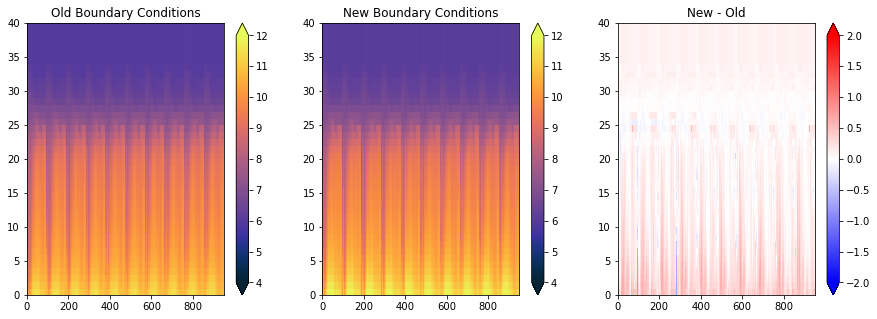

In [32]:
variable, name, cmap = 'votemper', 10, cm.thermal
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
make_plots(fig, axs, variable, name, old, new, cmap, 12, 4, 2)

(40, 950)


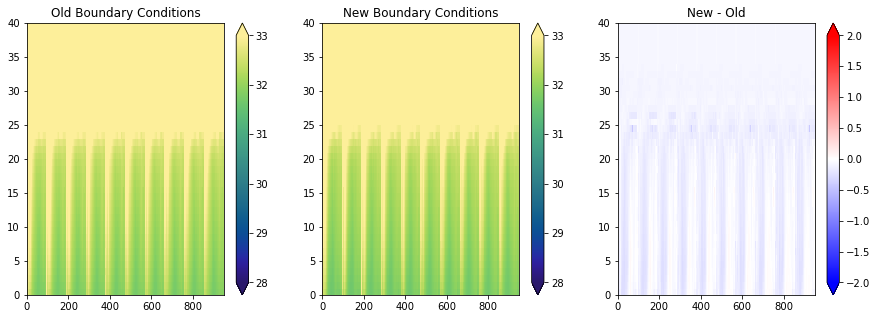

In [34]:
variable, name, cmap = 'vosaline', 'salinity', cm.haline
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
make_plots(fig, axs, variable, name, old, new, cmap, 33, 28, 2)

# Biology

(40, 950)


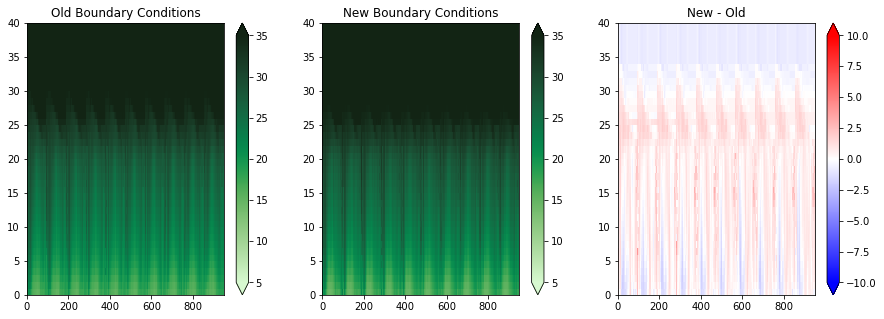

In [37]:
variable, name, cmap = 'NO3', 10, cm.algae
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
make_plots(fig, axs, variable, name, old, new, cmap, 35, 5, 10)

(40, 950)


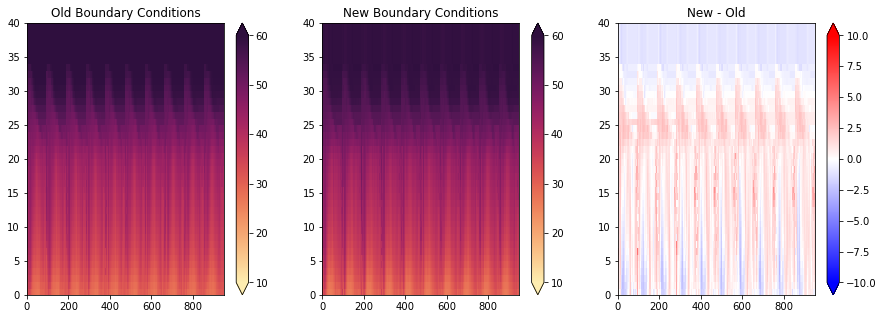

In [38]:
variable, name, cmap = 'Si', 10, cm.matter
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
make_plots(fig, axs, variable, name, old, new, cmap, 60, 10, 10)

(40, 950)


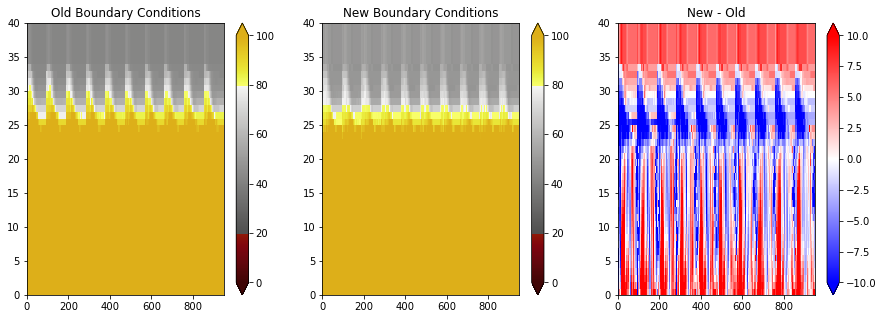

In [41]:
variable, name, cmap = 'OXY', 10, cm.oxy
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
make_plots(fig, axs, variable, name, old, new, cmap, 100, 0, 10)

(40, 950)


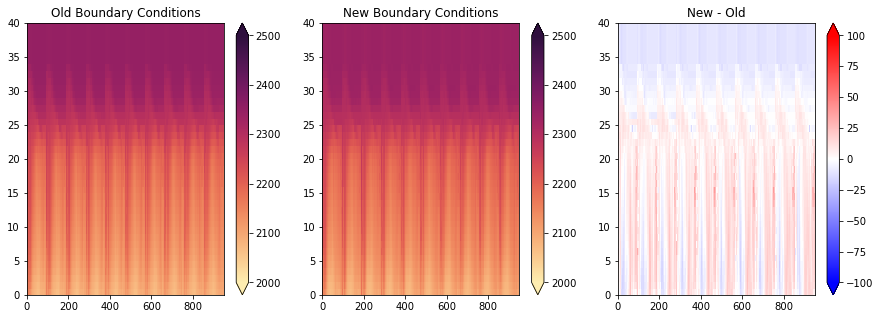

In [45]:
variable, name, cmap = 'DIC', 10, cm.matter
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
make_plots(fig, axs, variable, name, old, new, cmap, 2500, 2000, 100)

(40, 950)


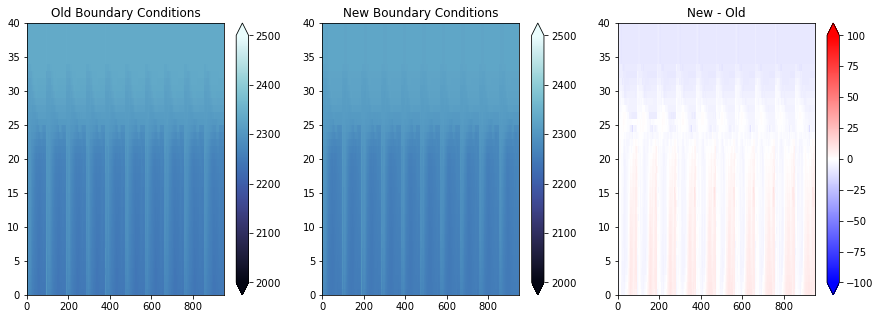

In [46]:
variable, name, cmap = 'TA', 10, cm.ice
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
make_plots(fig, axs, variable, name, old, new, cmap, 2500, 2000, 100)